### Importing Relevant Libraries

In [1]:
## Import required libraries

import pandas as pd  # data processing
import numpy as np  # mathemetical operations
import json  # to read json files

import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

import re  # regular expression
import string  # to perform string operations
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # to remove stopwords
from nltk.stem import PorterStemmer  # for stemming
from sklearn.feature_extraction.text import CountVectorizer  # to create bag of words
from sklearn.feature_extraction.text import TfidfVectorizer  # to create tf-idf
from gensim.models import KeyedVectors  # to create word vectors

from sklearn.model_selection import train_test_split  # to split the data
from sklearn.preprocessing import LabelEncoder  # to label encode the categorical values

## Import required libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

## to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

## stop warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### Loading the Dataset

In [6]:
## Load the data from the json file

with open('CETM47-22_23-AS2-Data_1145134601.json') as f:
    data = json.load(f)


## Convert the json data into a pandas dataframe

df = pd.DataFrame(data)
print(df.shape)
df.head()

(6443, 5)


,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [30]:
## label and their corresponding names in a dictionary

label_dict = {}

for d in data:
    label_dict[d['label']] = d['label_name']

label_dict = dict(sorted(label_dict.items()))
label_dict

{0: 'arts_&_culture',
 1: 'business_&_entrepreneurs',
 2: 'pop_culture',
 3: 'daily_life',
 4: 'sports_&_gaming',
 5: 'science_&_technology'}

In [8]:
## Dropping date, id, and label_name columns

df.drop(['date', 'id', 'label_name'], axis=1, inplace=True)
print(df.shape)
df.head()

(6443, 2)


,text,label
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4


### Class Distribution

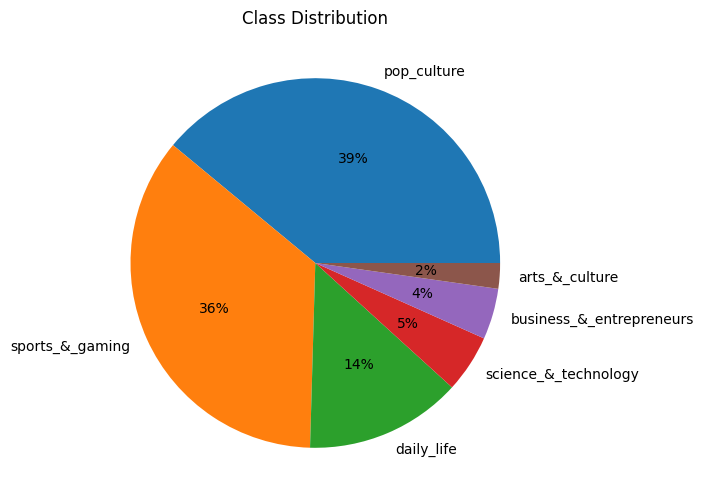

In [9]:
## class distribution in pie chart

df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6),
                                title='Class Distribution', ylabel='',
                                labels=[label_dict[i] for i in df['label'].value_counts().index])
plt.show()

### Text Preprocessing

In [10]:
## Preprocessing the text to remove punctuations, convert text to lowercase, and remove stopwords

process_text = lambda text: ' '.join([re.sub(r'[^\w\s]', '', word.lower()) for word in text.split() if word not in stopwords.words('english')])


## Apply the lambda function to the 'text' column

df['cleaned_text'] = df['text'].apply(process_text)
df.head()

,text,label,cleaned_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4,the clinton lumberkings beat cedar rapids kern...
1,I would rather hear Eli Gold announce this Aub...,4,i would rather hear eli gold announce auburn g...
2,"Someone take my phone away, I’m trying to not ...",4,someone take phone away im trying look chicago...
3,"A year ago, Louisville struggled to beat an FC...",4,a year ago louisville struggled beat fcs oppon...
4,Anyone know why the #Dodgers #Orioles game nex...,4,anyone know dodgers orioles game next thursday...


In [11]:
## Stemming the text

def stem_text(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['stemmed_text'] = df['text'].apply(stem_text)
df.head()

,text,label,cleaned_text,stemmed_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4,the clinton lumberkings beat cedar rapids kern...,the {@clinton lumberkings@} beat the {@cedar r...
1,I would rather hear Eli Gold announce this Aub...,4,i would rather hear eli gold announce auburn g...,i would rather hear eli gold announc thi aubur...
2,"Someone take my phone away, I’m trying to not ...",4,someone take phone away im trying look chicago...,"someon take my phone away, i’m tri to not look..."
3,"A year ago, Louisville struggled to beat an FC...",4,a year ago louisville struggled beat fcs oppon...,"a year ago, louisvil struggl to beat an fc opp..."
4,Anyone know why the #Dodgers #Orioles game nex...,4,anyone know dodgers orioles game next thursday...,anyon know whi the #dodger #oriol game next th...


### Text Representation

In [ ]:
## Creating bag of words

cv = CountVectorizer(max_features=5000, ngram_range=(1, 2))
bow = cv.fit_transform(df['stemmed_text'])
print(bow.shape)

(6443, 5000)


In [ ]:
## Creating tf-idf

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df['stemmed_text'])
print(tfidf_matrix.shape)

(6443, 5000)


In [ ]:
## loading the word2vec model

model_W2V = KeyedVectors.load_word2vec_format(r'GoogleNews-vectors-negative300.bin', binary=True)
print(model_W2V.vector_size)

300


In [ ]:
## function to create sentence embedding

def sentence_embedding(sentence):
    words = sentence.split()
    embedding = np.zeros(300)
    count = 0
    for word in words:
        if word in model_W2V.index_to_key:
            embedding += model_W2V[word]
            count += 1
    if count > 0:
        embedding /= count
    return embedding

In [ ]:
## creating sentence embedding

word2vec = []

for sentence in df['cleaned_text']:
    word2vec.append(sentence_embedding(sentence))

    if len(word2vec) % 250 == 0:
        print(len(word2vec), end=' ')

word2vec = np.array(word2vec)
print('\n')
print(word2vec.shape)

250 500 750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250 3500 3750 4000 4250 4500 4750 5000 5250 5500 5750 6000 6250 

(6443, 300)


### Machine Learning Models

In [13]:
## train test split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, df['label'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(word2vec, df['label'], test_size=0.2, random_state=42)

In [14]:
## Dataframe to store the results for each model

results = pd.DataFrame(columns=['Model', 'VectorType', 'CrossValidationScore', 'TestAccuracy', 'Precision', 'Recall', 'F1Score'])
results

,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score


In [ ]:
## logistic regression - bag of words

cross_val = cross_val_score(LogisticRegression(max_iter=10000), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
lr_bow = LogisticRegression(max_iter=10000).fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'Logistic Regression', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, lr_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, lr_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, lr_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, lr_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## logistic regression - tfidf

cross_val = cross_val_score(LogisticRegression(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
lr_tfidf = LogisticRegression(max_iter=10000).fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'Logistic Regression', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, lr_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, lr_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, lr_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, lr_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## logistic regression - word2vec

cross_val = cross_val_score(LogisticRegression(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
lr_w2v = LogisticRegression(max_iter=10000).fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'Logistic Regression', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, lr_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, lr_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, lr_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, lr_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'Logistic Regression']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
0,Logistic Regression,Bag of Words,0.769111,0.783553,0.773948,0.783553,0.775111
1,Logistic Regression,TF-IDF,0.744664,0.763382,0.751720,0.763382,0.735351
2,Logistic Regression,Word2Vec,0.795887,0.813809,0.811681,0.813809,0.808158


In [ ]:
## knn - bag of words

cross_val = cross_val_score(KNeighborsClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
knn_bow = KNeighborsClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'KNN', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, knn_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, knn_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, knn_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, knn_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## knn - tfidf

cross_val = cross_val_score(KNeighborsClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
knn_tfidf = KNeighborsClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'KNN', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, knn_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, knn_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, knn_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, knn_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## knn - word2vec

cross_val = cross_val_score(KNeighborsClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
knn_w2v = KNeighborsClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'KNN', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, knn_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, knn_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, knn_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, knn_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')


results[results['Model'] == 'KNN']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
3,KNN,Bag of Words,0.525029,0.552366,0.544284,0.552366,0.525042
4,KNN,TF-IDF,0.675592,0.691234,0.686036,0.691234,0.681882
5,KNN,Word2Vec,0.710322,0.724593,0.725167,0.724593,0.715136


In [ ]:
## svm - bag of words

cross_val = cross_val_score(SVC(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
svm_bow = SVC().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'SVM', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, svm_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, svm_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, svm_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, svm_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## svm - tfidf

cross_val = cross_val_score(SVC(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
svm_tfidf = SVC().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'SVM', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, svm_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, svm_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, svm_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, svm_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## svm - word2vec

cross_val = cross_val_score(SVC(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
svm_w2v = SVC().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'SVM', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, svm_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, svm_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, svm_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, svm_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'SVM']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
6,SVM,Bag of Words,0.703919,0.719162,0.719630,0.719162,0.681329
7,SVM,TF-IDF,0.732635,0.755625,0.755285,0.755625,0.721841
8,SVM,Word2Vec,0.798603,0.812258,0.812432,0.812258,0.804487


In [ ]:
## naive bayes - bag of words

cross_val = cross_val_score(MultinomialNB(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
nb_bow = MultinomialNB().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'Naive Bayes', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, nb_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, nb_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, nb_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, nb_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## naive bayes - tfidf

cross_val = cross_val_score(MultinomialNB(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
nb_tfidf = MultinomialNB().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'Naive Bayes', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, nb_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, nb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, nb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, nb_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## naive bayes - word2vec

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_w2v_scaled = minmax_scaler.fit_transform(X_train_w2v)
X_test_w2v_scaled = minmax_scaler.transform(X_test_w2v)

cross_val = cross_val_score(MultinomialNB(), X_train_w2v_scaled, y_train_w2v, cv=3, scoring='accuracy')
nb_w2v = MultinomialNB().fit(X_train_w2v_scaled, y_train_w2v)
results = results.append({'Model': 'Naive Bayes', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, nb_w2v.predict(X_test_w2v_scaled)),
                            'Precision': precision_score(y_test_w2v, nb_w2v.predict(X_test_w2v_scaled), average='weighted'),
                            'Recall': recall_score(y_test_w2v, nb_w2v.predict(X_test_w2v_scaled), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, nb_w2v.predict(X_test_w2v_scaled), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'Naive Bayes']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
9,Naive Bayes,Bag of Words,0.769887,0.784329,0.796928,0.784329,0.784921
10,Naive Bayes,TF-IDF,0.716337,0.728472,0.724466,0.728472,0.670342
11,Naive Bayes,Word2Vec,0.655025,0.657874,0.613061,0.657874,0.588997


In [ ]:
## decision tree - bag of words

cross_val = cross_val_score(DecisionTreeClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
dt_bow = DecisionTreeClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'Decision Tree', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, dt_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, dt_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, dt_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, dt_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## decision tree - tfidf

cross_val = cross_val_score(DecisionTreeClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
dt_tfidf = DecisionTreeClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'Decision Tree', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, dt_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, dt_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, dt_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, dt_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## decision tree - word2vec

cross_val = cross_val_score(DecisionTreeClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
dt_w2v = DecisionTreeClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'Decision Tree', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, dt_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, dt_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, dt_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, dt_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'Decision Tree']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
12,Decision Tree,Bag of Words,0.604191,0.617533,0.609837,0.617533,0.612263
13,Decision Tree,TF-IDF,0.574311,0.594259,0.589157,0.594259,0.591138
14,Decision Tree,Word2Vec,0.531238,0.525213,0.528057,0.525213,0.526602


In [ ]:
## random forest - bag of words

cross_val = cross_val_score(RandomForestClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
rf_bow = RandomForestClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'Random Forest', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, rf_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, rf_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, rf_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, rf_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## random forest - tfidf

cross_val = cross_val_score(RandomForestClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
rf_tfidf = RandomForestClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'Random Forest', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, rf_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, rf_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, rf_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, rf_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## random forest - word2vec

cross_val = cross_val_score(RandomForestClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
rf_w2v = RandomForestClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'Random Forest', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, rf_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, rf_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, rf_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, rf_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'Random Forest']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
15,Random Forest,Bag of Words,0.711098,0.729247,0.726421,0.729247,0.698773
16,Random Forest,TF-IDF,0.699845,0.712956,0.711318,0.712956,0.678831
17,Random Forest,Word2Vec,0.704501,0.706749,0.698616,0.706749,0.660917


In [ ]:
## Gradient Boosting - bag of words

cross_val = cross_val_score(GradientBoostingClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
gb_bow = GradientBoostingClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'Gradient Boosting', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, gb_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, gb_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, gb_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, gb_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## Gradient Boosting - tfidf

cross_val = cross_val_score(GradientBoostingClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
gb_tfidf = GradientBoostingClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'Gradient Boosting', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, gb_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, gb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, gb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, gb_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## Gradient Boosting - word2vec

cross_val = cross_val_score(GradientBoostingClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
gb_w2v = GradientBoostingClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'Gradient Boosting', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, gb_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, gb_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, gb_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, gb_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'Gradient Boosting']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
18,Gradient Boosting,Bag of Words,0.731277,0.728472,0.720862,0.728472,0.713842
19,Gradient Boosting,TF-IDF,0.721769,0.725369,0.718658,0.725369,0.711207
20,Gradient Boosting,Word2Vec,0.752425,0.754849,0.741800,0.754849,0.739621


In [ ]:
## XGBoost - bag of words

le = LabelEncoder()
y_train_bow_le = le.fit_transform(y_train_bow)
y_test_bow_le = le.transform(y_test_bow)

cross_val = cross_val_score(XGBClassifier(), X_train_bow, y_train_bow_le, cv=3, scoring='accuracy')
xgb_bow = XGBClassifier().fit(X_train_bow, y_train_bow_le)
results = results.append({'Model': 'XGBoost', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow_le, xgb_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow_le, xgb_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow_le, xgb_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow_le, xgb_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## XGBoost - tfidf

le = LabelEncoder()
y_train_tfidf_le = le.fit_transform(y_train_tfidf)
y_test_tfidf_le = le.transform(y_test_tfidf)

cross_val = cross_val_score(XGBClassifier(), X_train_tfidf, y_train_tfidf_le, cv=3, scoring='accuracy')
xgb_tfidf = XGBClassifier().fit(X_train_tfidf, y_train_tfidf_le)
results = results.append({'Model': 'XGBoost', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf_le, xgb_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf_le, xgb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf_le, xgb_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf_le, xgb_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## XGBoost - word2vec

le = LabelEncoder()
y_train_w2v_le = le.fit_transform(y_train_w2v)
y_test_w2v_le = le.transform(y_test_w2v)

cross_val = cross_val_score(XGBClassifier(), X_train_w2v, y_train_w2v_le, cv=3, scoring='accuracy')
xgb_w2v = XGBClassifier().fit(X_train_w2v, y_train_w2v_le)
results = results.append({'Model': 'XGBoost', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v_le, xgb_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v_le, xgb_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v_le, xgb_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v_le, xgb_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'XGBoost']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
21,XGBoost,Bag of Words,0.753007,0.759503,0.749294,0.759503,0.751144
22,XGBoost,TF-IDF,0.742142,0.745539,0.730022,0.745539,0.733576
23,XGBoost,Word2Vec,0.768529,0.788208,0.780955,0.788208,0.777253


In [ ]:
## LightGBM - bag of words

cross_val = cross_val_score(LGBMClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
lgbm_bow = LGBMClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'LightGBM', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, lgbm_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, lgbm_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, lgbm_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, lgbm_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## LightGBM - tfidf

cross_val = cross_val_score(LGBMClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
lgbm_tfidf = LGBMClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'LightGBM', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, lgbm_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, lgbm_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, lgbm_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, lgbm_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## LightGBM - word2vec

cross_val = cross_val_score(LGBMClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
lgbm_w2v = LGBMClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'LightGBM', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, lgbm_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, lgbm_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, lgbm_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, lgbm_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'LightGBM']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
24,LightGBM,Bag of Words,0.716143,0.757176,0.745467,0.757176,0.747238
25,LightGBM,TF-IDF,0.714009,0.751746,0.737050,0.751746,0.740617
26,LightGBM,Word2Vec,0.768917,0.777347,0.761622,0.777347,0.758684


In [ ]:
## MLP - bag of words

cross_val = cross_val_score(MLPClassifier(), X_train_bow, y_train_bow, cv=3, scoring='accuracy')
mlp_bow = MLPClassifier().fit(X_train_bow, y_train_bow)
results = results.append({'Model': 'MLP', 'VectorType': 'Bag of Words', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_bow, mlp_bow.predict(X_test_bow)),
                            'Precision': precision_score(y_test_bow, mlp_bow.predict(X_test_bow), average='weighted'),
                            'Recall': recall_score(y_test_bow, mlp_bow.predict(X_test_bow), average='weighted'),
                            'F1Score': f1_score(y_test_bow, mlp_bow.predict(X_test_bow), average='weighted')}, ignore_index=True)
print('Bag of Words - Completed')


## MLP - tfidf

cross_val = cross_val_score(MLPClassifier(), X_train_tfidf, y_train_tfidf, cv=3, scoring='accuracy')
mlp_tfidf = MLPClassifier().fit(X_train_tfidf, y_train_tfidf)
results = results.append({'Model': 'MLP', 'VectorType': 'TF-IDF', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_tfidf, mlp_tfidf.predict(X_test_tfidf)),
                            'Precision': precision_score(y_test_tfidf, mlp_tfidf.predict(X_test_tfidf), average='weighted'),
                            'Recall': recall_score(y_test_tfidf, mlp_tfidf.predict(X_test_tfidf), average='weighted'),
                            'F1Score': f1_score(y_test_tfidf, mlp_tfidf.predict(X_test_tfidf), average='weighted')}, ignore_index=True)
print('TF-IDF - Completed')


## MLP - word2vec

cross_val = cross_val_score(MLPClassifier(), X_train_w2v, y_train_w2v, cv=3, scoring='accuracy')
mlp_w2v = MLPClassifier().fit(X_train_w2v, y_train_w2v)
results = results.append({'Model': 'MLP', 'VectorType': 'Word2Vec', 'CrossValidationScore': cross_val.mean(),
                            'TestAccuracy': accuracy_score(y_test_w2v, mlp_w2v.predict(X_test_w2v)),
                            'Precision': precision_score(y_test_w2v, mlp_w2v.predict(X_test_w2v), average='weighted'),
                            'Recall': recall_score(y_test_w2v, mlp_w2v.predict(X_test_w2v), average='weighted'),
                            'F1Score': f1_score(y_test_w2v, mlp_w2v.predict(X_test_w2v), average='weighted')}, ignore_index=True)
print('Word2Vec - Completed')

results[results['Model'] == 'MLP']

Bag of Words - Completed
TF-IDF - Completed
Word2Vec - Completed


,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
27,MLP,Bag of Words,0.772604,0.766486,0.764526,0.766486,0.762696
28,MLP,TF-IDF,0.773768,0.771916,0.770625,0.771916,0.768157
29,MLP,Word2Vec,0.789096,0.782002,0.783229,0.782002,0.781858


In [16]:
## Complete Results

results

,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
0,Logistic Regression,Bag of Words,0.769111,0.783553,0.773948,0.783553,0.775111
1,Logistic Regression,TF-IDF,0.744664,0.763382,0.751720,0.763382,0.735351
2,Logistic Regression,Word2Vec,0.795887,0.813809,0.811681,0.813809,0.808158
3,KNN,Bag of Words,0.525029,0.552366,0.544284,0.552366,0.525042
4,KNN,TF-IDF,0.675592,0.691234,0.686036,0.691234,0.681882
5,KNN,Word2Vec,0.710322,0.724593,0.725167,0.724593,0.715136
6,SVM,Bag of Words,0.703919,0.719162,0.719630,0.719162,0.681329
7,SVM,TF-IDF,0.732635,0.755625,0.755285,0.755625,0.721841
8,SVM,Word2Vec,0.798603,0.812258,0.812432,0.812258,0.804487
9,Naive Bayes,Bag of Words,0.769887,0.784329,0.796928,0.784329,0.784921


In [17]:
## top 5 models

results.sort_values(by='TestAccuracy', ascending=False).head(5)

,Model,VectorType,CrossValidationScore,TestAccuracy,Precision,Recall,F1Score
2,Logistic Regression,Word2Vec,0.795887,0.813809,0.811681,0.813809,0.808158
8,SVM,Word2Vec,0.798603,0.812258,0.812432,0.812258,0.804487
23,XGBoost,Word2Vec,0.768529,0.788208,0.780955,0.788208,0.777253
9,Naive Bayes,Bag of Words,0.769887,0.784329,0.796928,0.784329,0.784921
0,Logistic Regression,Bag of Words,0.769111,0.783553,0.773948,0.783553,0.775111


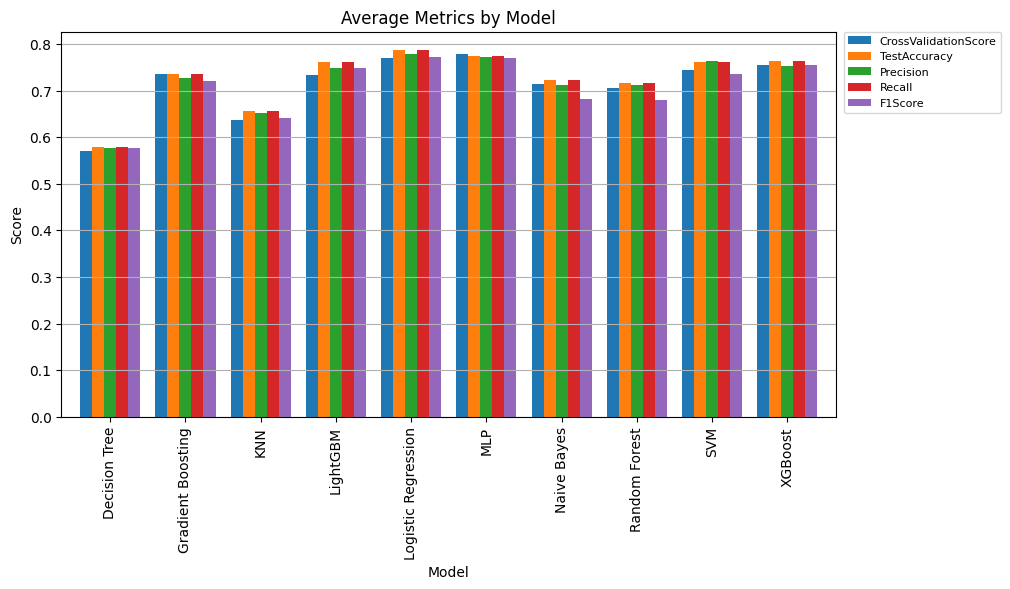

In [18]:
## Performance by Model

# Group results by model and calculate mean metrics
grouped_results = results.groupby('Model').mean()

# Create bar plot with increased bar width and legend outside the plot
ax = grouped_results.plot(kind='bar', figsize=(10, 5), width=0.8,)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1, borderaxespad=0, prop={'size': 8})

# Remove y-axis grid lines and keep x-axis grid lines
ax.grid(axis='y', linestyle='-')

# Set plot title and labels
plt.title('Average Metrics by Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()


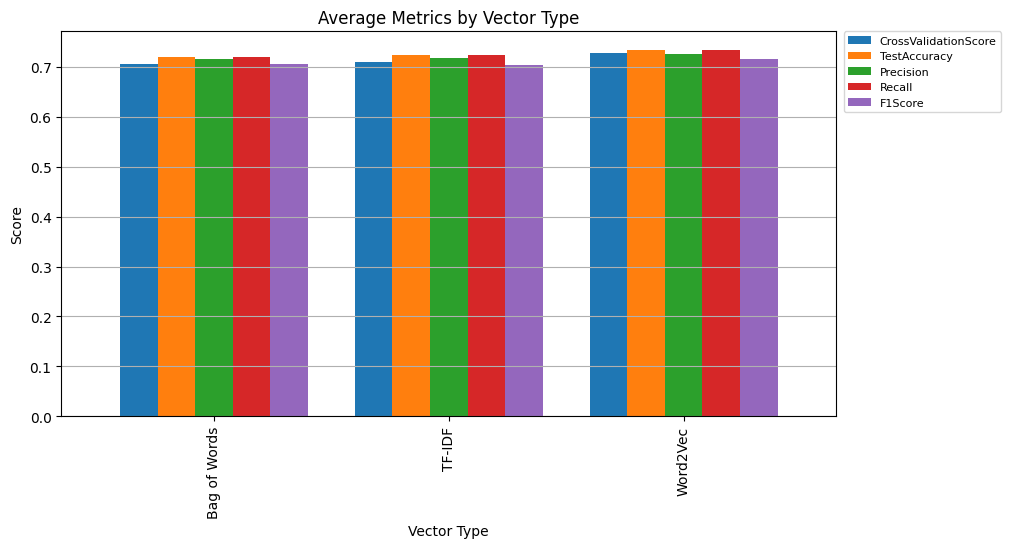

In [19]:
## Performance by Vector Type

# Group results by vector type and calculate mean metrics
grouped_results = results.groupby('VectorType').mean()

# Create bar plot with increased bar width and legend outside the plot
ax = grouped_results.plot(kind='bar', figsize=(10, 5), width=0.8,)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1, borderaxespad=0, prop={'size': 8})

# Remove y-axis grid lines and keep x-axis grid lines
ax.grid(axis='y', linestyle='-')

# Set plot title and labels
plt.title('Average Metrics by Vector Type')
plt.xlabel('Vector Type')
plt.ylabel('Score')
plt.show()

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-Score: 0.81


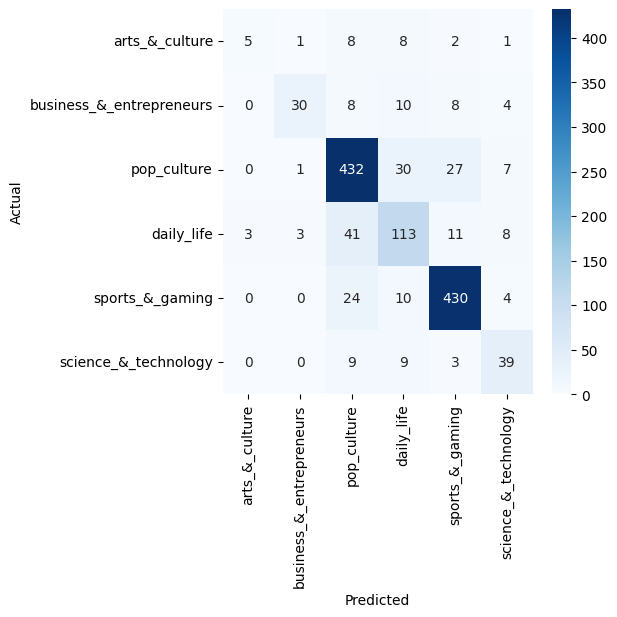

In [32]:
## Training the best model with best vector type
## logistic regression - word2vec

lr_w2v = LogisticRegression(max_iter=10000).fit(X_train_w2v, y_train_w2v)
y_pred = lr_w2v.predict(X_test_w2v)

acc = accuracy_score(y_test_w2v, y_pred)
prec = precision_score(y_test_w2v, y_pred, average='weighted')
rec = recall_score(y_test_w2v, y_pred, average='weighted')
f1 = f1_score(y_test_w2v, y_pred, average='weighted')

print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(prec))
print('Recall: {:.2f}'.format(rec))
print('F1-Score: {:.2f}'.format(f1))

## Confusion Matrix

cm = confusion_matrix(y_test_w2v, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-Score: 0.80


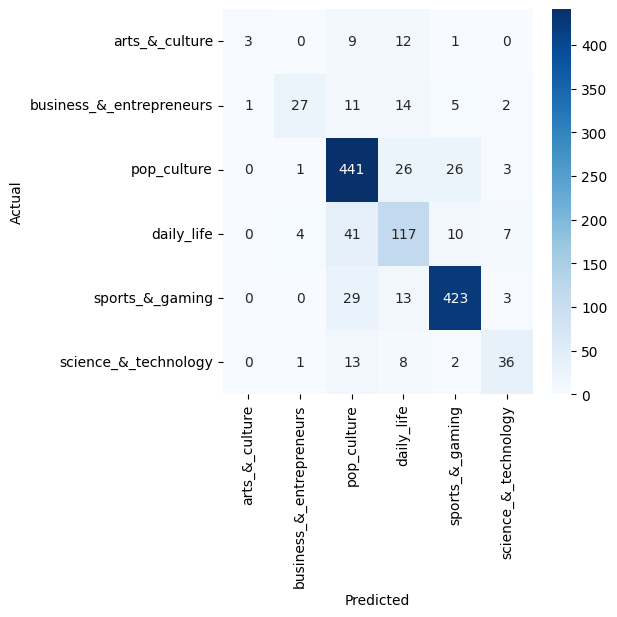

In [33]:
## second best model, just for comparison
## svm - word2vec

svm_w2v = SVC().fit(X_train_w2v, y_train_w2v)
y_pred = svm_w2v.predict(X_test_w2v)

acc = accuracy_score(y_test_w2v, y_pred)
prec = precision_score(y_test_w2v, y_pred, average='weighted')
rec = recall_score(y_test_w2v, y_pred, average='weighted')
f1 = f1_score(y_test_w2v, y_pred, average='weighted')

print('Accuracy: {:.2f}'.format(acc))
print('Precision: {:.2f}'.format(prec))
print('Recall: {:.2f}'.format(rec))
print('F1-Score: {:.2f}'.format(f1))

## plotting confusion matrix

cm = confusion_matrix(y_test_w2v, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()